In [270]:
import numpy as np
import pandas as pd

In [271]:
### Data Collection ###
data =  pd.read_csv("diabetes_dataset.csv")
display(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [272]:
### Standardization ###

# Example dataset (rows = samples, columns = features)
# data = np.array([
#     [2.5, 2.4],
#     [0.5, 0.7],
#     [2.2, 2.9],
#     [1.9, 2.2],
#     [3.1, 3.0],
#     [2.3, 2.7],
#     [2.0, 1.6],
#     [1.0, 1.1],
#     [1.5, 1.6],
#     [1.1, 0.9]
# ])

# 1. Calculate mean 
mean = {}
for col in data.columns:
    mean[col] = sum(data[col]) / len(data[col]) 

# 2. Calculate std
std_dev = {}
for col in data.columns:
    variance_sum = 0
    for x in data[col]:
        variance_sum += (x - mean[col])**2  
    variance = variance_sum / (len(data[col]) - 1)  
    std_dev[col] = variance**0.5  # Square root of variance for standard deviation


# 3. Standardize the dataset
standardized_data = (data - mean) / std_dev

print("Original Data:")
print(data)
print("\nMean of each feature:")
print(mean)
print("\nStandard Deviation of each feature:")
print(std_dev)
print("\nStandardized Data:")
print(standardized_data)


Original Data:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1   

In [273]:
### Covariance Matrix Calculation ###

# Step 1: Calculate the covariance matrix
# Method 1: Using the formula
n_samples = standardized_data.shape[0]
cov_matrix = (standardized_data.T @ standardized_data) / (n_samples - 1)

# Method 2: Using NumPy's built-in function for validation (For test)
# cov_matrix_numpy = np.cov(standardized_data, rowvar=False)

print("Standardized Data:")
print(standardized_data)
print("\nCovariance Matrix (Manual Calculation):")
print(cov_matrix)

# For test
# print("\nCovariance Matrix (Using np.cov):") 
# print(cov_matrix_numpy)

Standardized Data:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530  0.847771       0.149543       0.906679 -0.692439  0.203880   
1      -0.844335 -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
2       1.233077  1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
3      -0.844335 -0.997558      -0.160441       0.154433  0.123221 -0.493721   
4      -1.141108  0.503727      -1.503707       0.906679  0.765337  1.408828   
..           ...       ...            ...            ...       ...       ...   
763     1.826623 -0.622237       0.356200       1.721613  0.869464  0.115094   
764    -0.547562  0.034575       0.046215       0.405181 -0.692439  0.609757   
765     0.342757  0.003299       0.149543       0.154433  0.279412 -0.734711   
766    -0.844335  0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
767    -0.844335 -0.872451       0.046215       0.655930 -0.692439 -0.201997   

     DiabetesPedigre

In [274]:
cov_matrix.shape

(9, 9)

<AxesSubplot: >

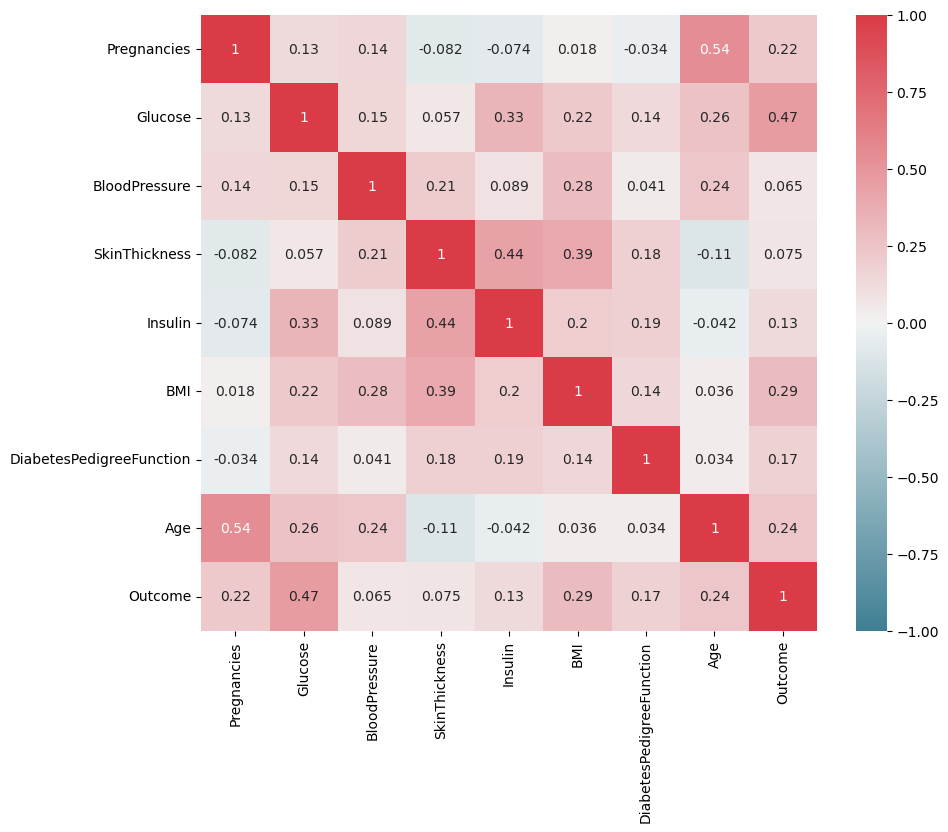

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cov_matrix,
    cmap=sns.diverging_palette(220, 10, as_cmap=True,),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax,annot=True)

In [276]:
### Eigenvalues and Eigenvectors ###

# Step 1: Calculate eigenvalues and eigenvectors
eigenvalues,_= np.linalg.eig(cov_matrix)


# from sympy import symbols, det, eye, solve, Matrix

# def compute_eigenvalues_general(matrix):
#     """
#     Compute eigenvalues of an n x n matrix from scratch using symbolic computation.
#     """
#     eigenvalues = []
#     # Ensure the matrix is square
#     n, m = matrix.shape
#     if n != m:
#         return ValueError("Matrix must be square!")
    
#     # Step 1: Define a symbolic variable for λ
#     L = symbols("L")
#     # Step 2: Create A - λI (A minus lambda times identity matrix)
#     I = eye(n)  # Identity matrix of size n
#     A_minus_lambda_I = Matrix(matrix) - L * I  # SymPy Matrix for symbolic computation
    
#     # Step 3: Compute the determinant of (A - λI)
#     characteristic_polynomial = det(A_minus_lambda_I)
    
#     # Step 4: Solve the characteristic polynomial for λ
#     eigenvalues_sym = solve(characteristic_polynomial, L)

#     # for ev in eigenvalues_sym:
#     #     eigenvalues.append(ev.evalf)
#     eigenvalues = [complex(ev.evalf()) for ev in eigenvalues_sym]
    
#     return eigenvalues

# # Example usage
# A = np.array([[4, 1, 2],
#               [1, 3, 1],
#               [2, 1, 3]])

# eigenvaluesTest = compute_eigenvalues_general(A)
# print("Eigenvalues:", eigenvaluesTest)
# eigenvalues = compute_eigenvalues_general(cov_matrix)



# from screatch (Don't it be work ???? ) please check this function
# Compute Eigenvectors for each eigenvalue
def compute_eigenvectors(matrix, eigenvalues):
    eigenvectors = []
    for value in eigenvalues:
        # Solve (A - λI) v = 0 for each eigenvalue
        # Create matrix (A - λI)
        I = np.eye(matrix.shape[0])  # Identity matrix of same size as A
        x = matrix - value * I
        
        # Solve for the null space of (A - λI)
        # Using SVD to find the null space
        U, S, Vt = np.linalg.svd(x) 
        eigenvector = Vt[-1]  # The last row of V^T gives the eigenvector
        eigenvectors.append(eigenvector)
    
    return np.array(eigenvectors)

# Get eigenvectors
eigenvectorsScretch = compute_eigenvectors(cov_matrix, eigenvalues)
# print("Eigenvectors from scretch:", eigenvectorsScretch)

# Step 2: Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectorsScretch [:, sorted_indices]

print("Covariance Matrix:")
print(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Covariance Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose               

In [277]:


# # SymPy to NumPy conversion function
# def sympy_to_numpy(sympy_matrix):
#     return np.array(sympy_matrix).astype(float)

# # Compute eigenvalues
# def compute_eigenvalues_general(matrix):
#     """
#     Compute eigenvalues of an n x n matrix from scratch using symbolic computation.
    
#     Args:
#         matrix (np.ndarray): The input square matrix (n x n).

#     Returns:
#         list: Eigenvalues as complex numbers.
#     """
#     from sympy import symbols, eye, Matrix, det, solve
#     n, m = matrix.shape
#     if n != m:
#         raise ValueError("Matrix must be square!")
#     L = symbols("L")
#     I = eye(n)
#     A_minus_lambda_I = Matrix(matrix) - L * I
#     characteristic_polynomial = det(A_minus_lambda_I)
#     symbolic_eigenvalues = solve(characteristic_polynomial, L)
#     numerical_eigenvalues = [complex(ev.evalf()) for ev in symbolic_eigenvalues]
#     return numerical_eigenvalues


# def compute_eigenvectors(matrix, eigenvalues):
#     """
#     Compute eigenvectors of a matrix corresponding to given eigenvalues.
    
#     Args:
#         matrix (np.ndarray): The input square matrix (n x n) as a NumPy array.
#         eigenvalues (list): Eigenvalues as numerical (complex) values.

#     Returns:
#         np.ndarray: Eigenvectors of the matrix.
#     """
#     eigenvectors = []
#     for value in eigenvalues:
#         I = np.eye(matrix.shape[0], dtype=complex)  # Identity matrix
#         matrix_minus_lambda_I = matrix - value * I
#         _, _, vh = np.linalg.svd(matrix_minus_lambda_I)
#         eigenvector = vh[-1]  # The last row of V^T gives the eigenvector
#         eigenvectors.append(eigenvector)
#     return np.array(eigenvectors)


# import numpy as np

# # Example matrix (can result in complex eigenvalues)
# A = np.array([[4, 1, -2],
#               [1, 3, 1],
#               [-2, 1, 3]])

# # Compute eigenvalues
# eigenvalues = compute_eigenvalues_general(A)
# print("Eigenvalues:", eigenvalues)

# # Ensure matrix is numerical (float or complex)
# A_numerical = np.array(A, dtype=complex)

# # Compute eigenvectors
# eigenvectors = compute_eigenvectors(A_numerical, eigenvalues)
# print("Eigenvectors:")
# print(eigenvectors)


In [278]:
# ถ้าแบบว่ากูกดรัน มันจะขึ้นรันของมึงด้วยมั้ยอะ ใช่
# run เลย ตอนนี้เหมือนมึงมาทำงานบนเครื่องกุ

In [279]:
### Principal Components ###

# Step 1: Select top k principal components 
k = 2
principal_eigenvectors = eigenvectors[:, :k]

# Step 2: Transform the dataset
transformed_data = np.dot(standardized_data,principal_eigenvectors)

print(f"\nTop 2 Principal Component:")
print(principal_eigenvectors)
print("\nTransformed Data:")
print(transformed_data)


Top 2 Principal Component:
[[-0.21599835 -0.43675677]
 [-0.52744611 -0.09563451]
 [ 0.16451225 -0.39141738]
 [ 0.26505155  0.58107579]
 [-0.54064221  0.02524536]
 [ 0.07851795 -0.20799965]
 [ 0.4567731  -0.38274945]
 [-0.16088274  0.32712336]
 [-0.21176571 -0.10877916]]

Transformed Data:
[[-0.23447768  0.18652222]
 [ 1.22835918  1.12890373]
 [-1.38389832 -1.57147457]
 ...
 [-0.33249139  0.29258498]
 [-0.61163427  0.19820457]
 [ 1.26126882  0.81574485]]


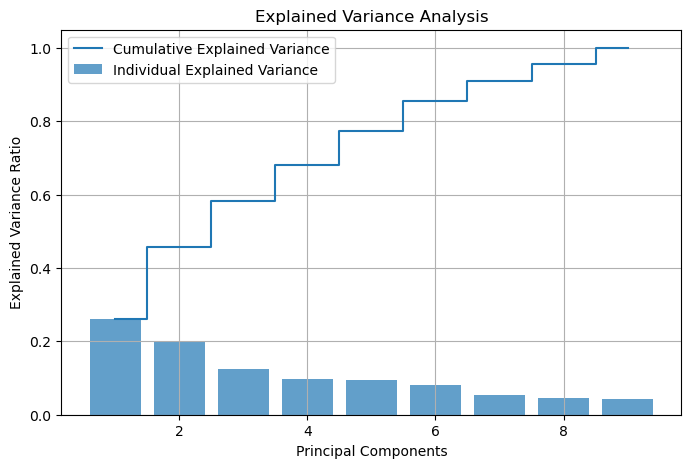

Eigenvalues:
[2.35250159 1.77431203 1.12022513 0.88195488 0.84462341 0.73486824
 0.4884234  0.41818113 0.38491019]

Explained Variance Ratio:
[0.26138907 0.19714578 0.12446946 0.09799499 0.09384705 0.08165203
 0.05426927 0.04646457 0.0427678 ]

Cumulative Explained Variance:
[0.26138907 0.45853485 0.58300431 0.68099929 0.77484634 0.85649836
 0.91076763 0.9572322  1.        ]


In [280]:
### Explained Variance Analysis ###

# Step 1: Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Step 2: Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Step 3: Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(eigenvalues) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(eigenvalues) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Analysis')
plt.legend(loc='best')
plt.grid(True)
plt.show()


print("Eigenvalues:")
print(eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

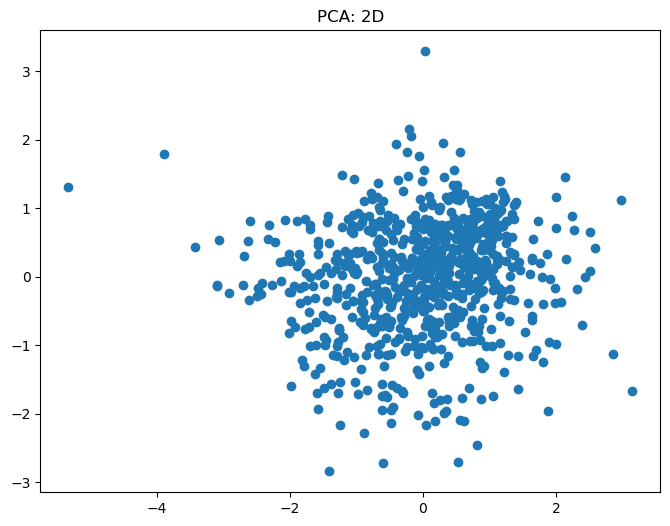

Transformed Data :
[[-0.23447768  0.18652222]
 [ 1.22835918  1.12890373]
 [-1.38389832 -1.57147457]
 ...
 [-0.33249139  0.29258498]
 [-0.61163427  0.19820457]
 [ 1.26126882  0.81574485]]


In [289]:
### Visualization ###
# transformed_data = np.random.rand(768, 1)
# Plot the transformed 2D data
plt.figure(figsize=(8, 6))
plt.title('PCA: 2D')
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.show()


print("Transformed Data :")
print(transformed_data)


In [282]:
transformed_data.shape


(768, 2)

In [283]:
print(transformed_data)

[[-0.23447768  0.18652222]
 [ 1.22835918  1.12890373]
 [-1.38389832 -1.57147457]
 ...
 [-0.33249139  0.29258498]
 [-0.61163427  0.19820457]
 [ 1.26126882  0.81574485]]


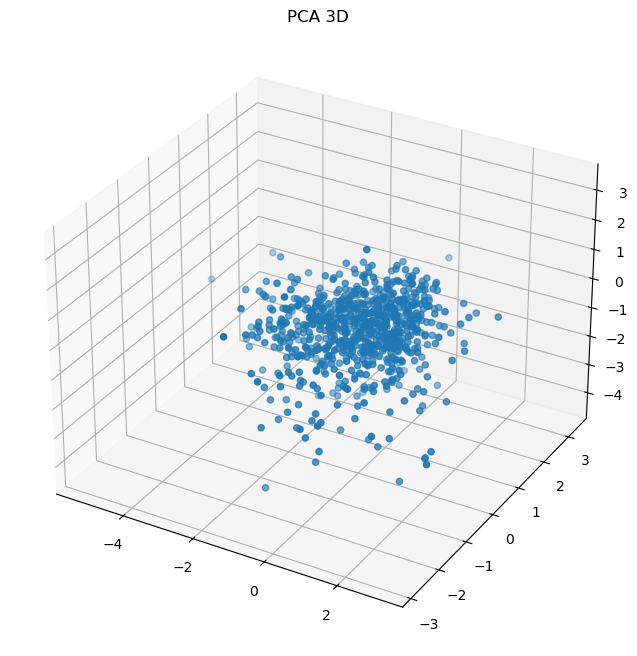

Transformed Data :
            0         1         2
0   -0.234478  0.186522 -0.239089
1    1.228359  1.128904  0.238037
2   -1.383898 -1.571475 -1.070906
3    0.519776  0.813797  0.534285
4    1.888533 -0.961239 -3.604240
..        ...       ...       ...
763 -0.679434  1.375633 -0.036706
764  0.695779  0.367220  0.680655
765 -0.332491  0.292585  0.070798
766 -0.611634  0.198205  0.365857
767  1.261269  0.815745  0.579067

[768 rows x 3 columns]


In [284]:
# 3D for optional 


# Step 1: Select top 3 principal components (k=3)
top_eigenvectors_3d = eigenvectors[:, :3]

# Step 2: Transform the data into the new 3D space (project data onto top 3 eigenvectors)
transformed_data_3d = standardized_data @ top_eigenvectors_3d

# Step 3: Plot the transformed 3D data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data_3d[0], transformed_data_3d[1], transformed_data_3d[2])

ax.set_title('PCA 3D')

plt.show()

print("Transformed Data :")
print(transformed_data_3d)

Eigenvalues-------------
   From scratch :  [2.35250159 1.77431203]
   From Sklearn :  [2.35556873 1.77662535]

Transformed Data-------------
   From scratch : 
[[-0.23447768  0.18652222]
 [ 1.22835918  1.12890373]
 [-1.38389832 -1.57147457]
 [ 0.51977575  0.81379716]
 [ 1.88853283 -0.96123851]]

   From Sklearn : 
[[-1.75694707 -1.11174258]
 [ 1.50742148  0.55940565]
 [-0.65082201 -1.92957633]
 [ 1.58739782  1.06507465]
 [-2.48337392  2.35956252]]

Explained Variance Ratio (Sklearn): [0.26138907 0.19714578]


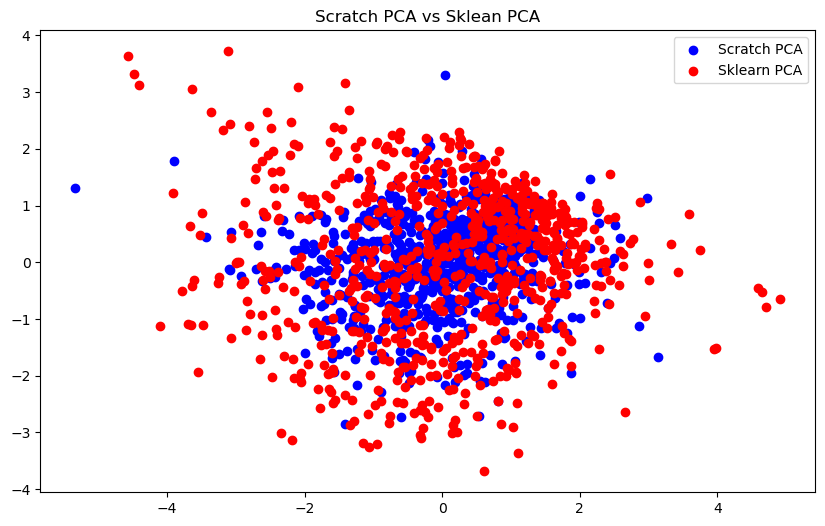

In [288]:
### Comparison with Sklearn’s PCA ###

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Use Sklearn's StandardScaler for consistent results
scaler = StandardScaler()
standardized_data_sklearn = scaler.fit_transform(data)


# Compute PCA with Sklearn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(standardized_data_sklearn)

# Extract eigenvalues and explained variance ratio from Sklearn
sklearn_eigenvalues = pca.explained_variance_
sklearn_explained_variance_ratio = pca.explained_variance_ratio_

# Compare Results ------------------------------------------------

# Compare Eigenvalues
print("Eigenvalues-------------")
print("   From scratch : ", eigenvalues[:2])
print("   From Sklearn : ", sklearn_eigenvalues)

# Compare Transformed Data
print("\nTransformed Data-------------")
print("   From scratch : ")
print(transformed_data[:5]) 
print("\n   From Sklearn : ")
print(X_pca[:5])

# Compare Explained Variance Ratios
print("\nExplained Variance Ratio (Sklearn):", sklearn_explained_variance_ratio)

### 5. Plot Results for Visual Confirmation
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:,0], transformed_data[:,1], color='blue', label='Scratch PCA')
plt.scatter(X_pca[:,0], X_pca[:,1], color='red', label='Sklearn PCA')
plt.title('Scratch PCA vs Sklean PCA')
plt.legend()
plt.show()


In [286]:
transformed_data

array([[-0.23447768,  0.18652222],
       [ 1.22835918,  1.12890373],
       [-1.38389832, -1.57147457],
       ...,
       [-0.33249139,  0.29258498],
       [-0.61163427,  0.19820457],
       [ 1.26126882,  0.81574485]])